# Imports

In [1]:
import sys
sys.path.append("../..")

from Qcircuits.core_net import Qcircuit_GUI
from Qcircuits.core_net import Qcircuit_NET, L,J,C,R
import Qcircuits.core_net as core

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.coolwarm(np.linspace(0.,1.,6))
blue = colors[1].tolist()
red = colors[4].tolist()

# Using the GUI

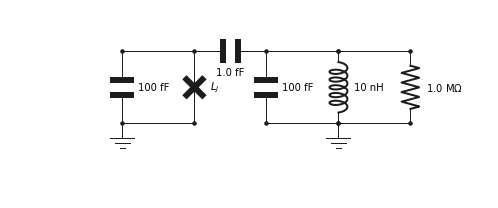

C 1 2 1.0 fF
C 0 1 100 fF
J 0 1 L_J
C 0 2 100 fF
L 0 2 10 nH
R 0 2 1.0 MOhm




In [4]:
# Construct the circuit
c = Qcircuit_GUI('transmon_cQED.txt', edit=True, plot=True, print_network=True)

In [3]:
# compute hamiltonian parameters on resonance
w,k,A,chi = c.w_k_A_chi(L_J = 10e-9,pretty_print=True)

    mode |  freq.  |  diss.  |  anha.  |
       0 | 5.0 GHz | 390 kHz |  48 MHz |
       1 | 5.0 GHz | 398 kHz |  48 MHz |

Kerr coefficients
(diagonal = Kerr, off-diagonal = cross-Kerr)
    mode |    0    |    1    |
       0 |  48 MHz |         |
       1 |  96 MHz |  48 MHz |



In [4]:
# compute hamiltonian parameters off resonance
w,k,A,chi = c.w_k_A_chi(L_J =  9e-9,pretty_print=True)

    mode |  freq.  |  diss.  |  anha.  |
       0 | 5.0 GHz | 780 kHz |  13 kHz |
       1 | 5.3 GHz | 7.5 kHz | 189 MHz |

Kerr coefficients
(diagonal = Kerr, off-diagonal = cross-Kerr)
    mode |    0    |    1    |
       0 |  13 kHz |         |
       1 | 3.1 MHz | 189 MHz |



In [5]:
# compute hamiltonian parameters for an array of L_J
L_J_list = np.linspace(11e-9,9e-9)
w,k,A,chi = c.w_k_A_chi(L_J = L_J_list)

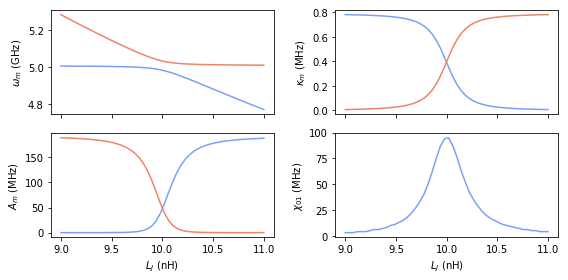

In [8]:
mode_0_color= blue
mode_1_color = red

fig,ax = plt.subplots(2,2,sharex = True,figsize = (8,4))
ax[0][0].plot(L_J_list*1e9,w[0]/1e9,label = 'mode #0',color = mode_0_color)
ax[0][0].plot(L_J_list*1e9,w[1]/1e9,label = 'mode #1',color = mode_1_color)
ax[0][0].set_ylabel('$\omega_m$ (GHz)')


ax[0][1].plot(L_J_list*1e9,k[0]/1e6,color = mode_0_color)
ax[0][1].plot(L_J_list*1e9,k[1]/1e6,color = mode_1_color)
ax[0][1].set_ylabel('$\kappa_m$ (MHz)')

ax[1][0].plot(L_J_list*1e9,A[0]/1e6,color = mode_0_color)
ax[1][0].plot(L_J_list*1e9,A[1]/1e6,color = mode_1_color)
ax[1][0].set_ylabel('$A_m$ (MHz)')

ax[1][1].plot(L_J_list*1e9,chi[0][1]//1e6,color = mode_0_color)
ax[1][1].set_ylabel('$\chi_{01}$ (MHz)')

ax[1][0].set_xlabel('$L_J$ (nH)')
ax[1][1].set_xlabel('$L_J$ (nH)')

# ax[0][0].legend(loc=(0.6,0.6),fontsize=8,frameon = False,handletextpad  = 0.5)
plt.tight_layout()
plt.show()

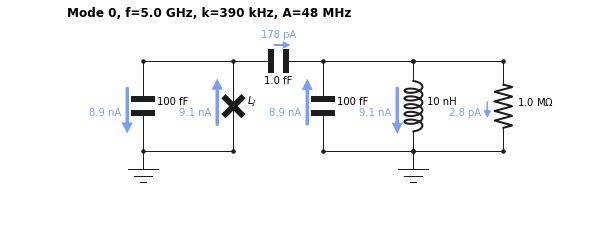

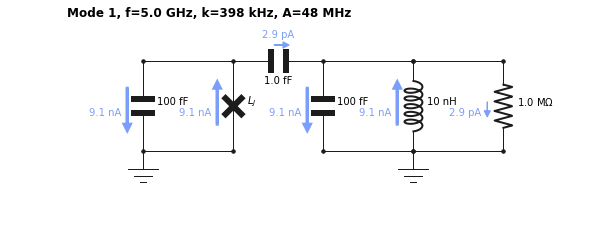

In [9]:
unit = 'current'
c.show_normal_mode(mode=0,unit=unit, L_J = 10e-9,)
c.show_normal_mode(mode=1,unit=unit, L_J = 10e-9)

In [10]:
H = c.hamiltonian(L_J = 10e-9)#, modes = 'all', junction_expansion = 6, photons = 10)
eigenvals, eigenstates = H.eigenstates()
print ("f- = %.2f GHz (from hamiltonian)"%(np.absolute(eigenvals[1]-eigenvals[0])/1e9))
print ("f+ = %.2f GHz (from hamiltonian)"%(np.absolute(eigenvals[2]-eigenvals[0])/1e9))

f- = 4.80 GHz (from hamiltonian)
f+ = 5.01 GHz (from hamiltonian)


# Without a GUI

In [11]:
c_net = Qcircuit_NET([
    C(0,1,100e-15),
    J(0,1,'L_J'),
    C(1,2,1e-15),
    C(2,0,100e-15),
    L(2,0,10e-9),
    R(2,0,1e6)
])

In [12]:
c_net.w_k_A_chi(L_J = 8e-9,pretty_print=True)


    mode |  freq.  |  diss.  |  anha.  |
       0 | 5.0 GHz | 786 kHz |  583 Hz |
       1 | 5.6 GHz | 1.9 kHz | 191 MHz |

Kerr coefficients
(diagonal = Kerr, off-diagonal = cross-Kerr)
    mode |    0    |    1    |
       0 |  583 Hz |         |
       1 | 667 kHz | 191 MHz |



(array([5.00696407e+09, 5.60042136e+09]),
 array([786052.4226011 ,   1920.57996173]),
 [582.6669456696195, 191131053.8779992],
 array([[5.82666946e+02, 6.67430138e+05],
        [6.67430138e+05, 1.91131054e+08]]))